<a href="https://colab.research.google.com/github/Badal3375/Cognifyz_project_2/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** LEVEL 2 ***

## TASK 1

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Dataset .csv')

In [ ]:
df['Has Table booking'] = df['Has Table booking'].str.lower()
df['Has Online delivery'] = df['Has Online delivery'].str.lower()

# Total number of restaurants
total = len(df)

# Calculate percentages
# Changed 'Has Table Booking' to 'Has Table booking' (lowercase 'b')


In [ ]:
table_booking_pct = (df['Has Table booking'] == 'yes').sum() / total * 100
online_delivery_pct = (df['Has Online delivery'] == 'yes').sum() / total * 100

print(f"Percentage of restaurants with table booking: {table_booking_pct:.2f}%")
print(f"Percentage of restaurants with online delivery: {online_delivery_pct:.2f}%")

Percentage of restaurants with table booking: 12.12%
Percentage of restaurants with online delivery: 25.66%


In [ ]:
# Filter based on table booking
# Use the correct column name 'Has Table booking'
with_booking = df[df['Has Table booking'] == 'yes']
without_booking = df[df['Has Table booking'] == 'no']

# Calculate average ratings
avg_rating_with = with_booking['Aggregate rating'].mean()
avg_rating_without = without_booking['Aggregate rating'].mean()

print(f"Average rating (with table booking): {avg_rating_with:.2f}")
print(f"Average rating (without table booking): {avg_rating_without:.2f}")

Average rating (with table booking): 3.44
Average rating (without table booking): 2.56


In [ ]:
# Group by price range and calculate % of restaurants offering online delivery
online_delivery_by_price = df.groupby('Price range')['Has Table booking'].apply(
    lambda x: (x == 'yes').mean() * 100
)

# Display results
print("Online delivery availability by price range:")
print(online_delivery_by_price)

Online delivery availability by price range:
Price range
1     0.022502
2     7.677482
3    45.738636
4    46.757679
Name: Has Table booking, dtype: float64


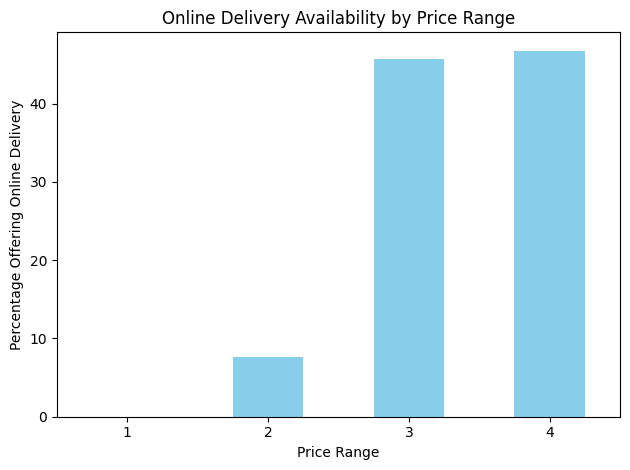

In [ ]:
import matplotlib.pyplot as plt

# Plot for Question 3
online_delivery_by_price.plot(kind='bar', color='skyblue')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage Offering Online Delivery')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


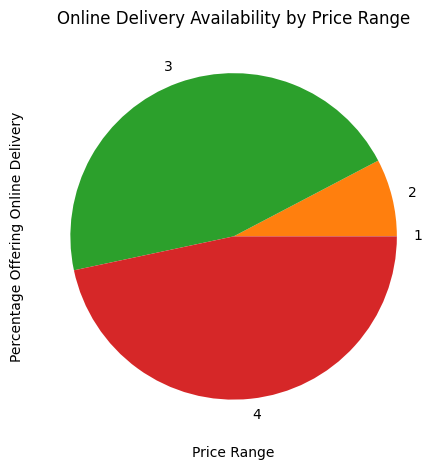

In [ ]:
import matplotlib.pyplot as plt

# Plot for Question 3
online_delivery_by_price.plot(kind='pie', color='skyblue')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage Offering Online Delivery')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


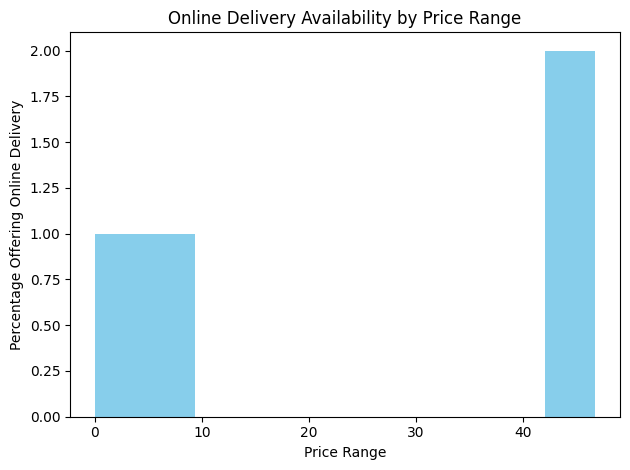

In [ ]:
import matplotlib.pyplot as plt

# Plot for Question 3
online_delivery_by_price.plot(kind='hist', color='skyblue')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage Offering Online Delivery')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# ***Task 2 ***

*Determine the most common price range among all the restaurants*

In [ ]:
# Most common (mode) price range
most_common_price_range = df['Price range'].mode()[0]

print(f"Most common price range: {most_common_price_range}")


Most common price range: 1


  *** calculate the average rating for each price*** *

In [ ]:
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()

print("Average rating by price range:")
print(avg_rating_by_price)


Average rating by price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [ ]:
# Group by price range and get average rating and rating color
grouped = df.groupby('Price range').agg({
    'Aggregate rating': 'mean',
    'Rating color': lambda x: x.mode()[0]  # most common color in the group
})

# Find price range with highest average rating
highest_avg_rating = grouped['Aggregate rating'].idxmax()
highest_color = grouped.loc[highest_avg_rating, 'Rating color']

print(f"The color representing the highest average rating is: {highest_color}")


The color representing the highest average rating is: Yellow


In [ ]:
df['Rating color'].max()

'Yellow'

In [ ]:
df['Rating color'].min()

'Dark Green'

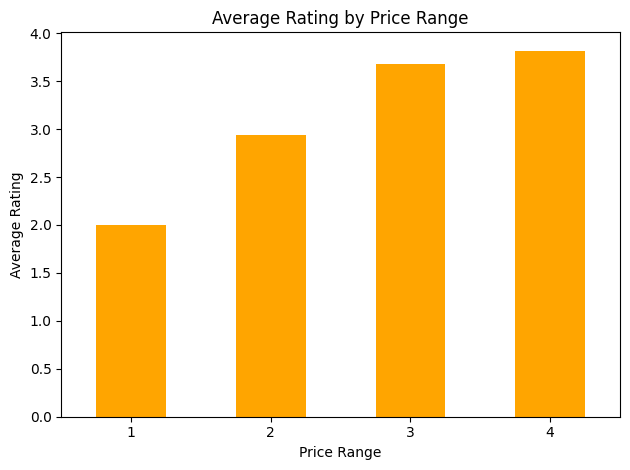

In [ ]:
import matplotlib.pyplot as plt

# Plot average rating by price range
avg_rating_by_price.plot(kind='bar', color='orange') # Removed the trailing space
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ***Task -3 ***

In [ ]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,name_length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,yes,no,No,No,3,4.8,Dark Green,Excellent,314,16


In [ ]:
# Print the column names to check for the correct restaurant name column
print(df.columns)

# Based on the likely column name, replace 'restaurant_name' with the correct name from the output above.
# For example, if the column is named 'Restaurant Name', change the code to:
# df['name_length'] = df['Restaurant Name'].astype(str).apply(len)

# Assuming the column name is 'Restaurant Name' (with spaces and capitalization), the corrected code is:
df['name_length'] = df['Restaurant Name'].astype(str).apply(len)

# Feature: Length of address
df['address_length'] = df['Address'].astype(str).apply(len)

# Feature: Number of cuisines listed
df['num_cuisines'] = df['Cuisines'].astype(str).apply(lambda x: len(x.split(',')))

print(df[['Restaurant Name', 'name_length', 'address_length', 'num_cuisines']].head())

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'name_length', 'address_length', 'num_cuisines'],
      dtype='object')
          Restaurant Name  name_length  address_length  num_cuisines
0        Le Petit Souffle           16              71             3
1        Izakaya Kikufuji           16              67             1
2  Heat - Edsa Shangri-La           22              56             4
3                    Ooma            4              70             2
4             Sambo Kojin           11              64             2


In [ ]:
# Encode 'has_table_booking' and 'has_online_delivery' into binary
df[' Is delivering now'] = df['Is delivering now'].str.lower().map({'yes': 1, 'no': 0})
df['  Has Online delivery'] = df['Has Online delivery'].str.lower().map({'yes': 1, 'no': 0})

# Handle any missing values (if applicable)
df[' Is delivering now'] = df['Is delivering now'].fillna(0)
df['Has Online delivery'] = df['Has Online delivery'].fillna(0)

print(df[[' Is delivering now', 'Has Online delivery', ' Is delivering now', 'Has Online delivery']].head(10))


   Is delivering now Has Online delivery  Is delivering now  \
0                 No                  no                 No   
1                 No                  no                 No   
2                 No                  no                 No   
3                 No                  no                 No   
4                 No                  no                 No   
5                 No                  no                 No   
6                 No                  no                 No   
7                 No                  no                 No   
8                 No                  no                 No   
9                 No                  no                 No   

  Has Online delivery  
0                  no  
1                  no  
2                  no  
3                  no  
4                  no  
5                  no  
6                  no  
7                  no  
8                  no  
9                  no  


In [ ]:
# One-hot encode price_range
df = pd.get_dummies(df, columns=['Price range'], prefix='price')

# One-hot encode rating color
df = pd.get_dummies(df, columns=['Rating color'], prefix='color')

# View new columns
print(df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 